Corner points (feasible):
(0.0, 3.0)
(0.0, 4.0)
(0.5, 2.5)
P(0.00,3.00) = 6.00
P(0.00,4.00) = 8.00
P(0.50,2.50) = 6.50

Max occurs at: (0.0, 4.0) with P = 8.0

Slack/Surplus at each corner:
 (x,y)      s1 = x+y-3   s2 = 4-(3x+y)
 (0.00,3.00)       0.00          1.00
 (0.00,4.00)       1.00          0.00
 (0.50,2.50)       0.00          0.00


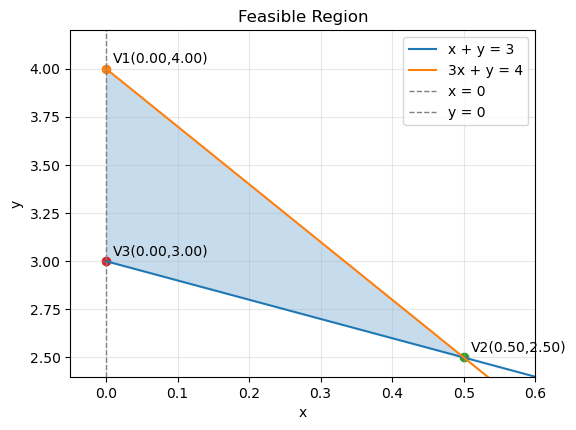


Check with a built-in LP solver (scipy.linprog):
 status: Optimization terminated successfully. (HiGHS Status 7: Optimal)
 x* = 0.000000, y* = 4.000000,  P* = 8.000000


In [3]:
# WW Set 03 – Problem 3
# Maximize P = 3x + 2y


candidates = [
    (0.0, 3.0),
    (0.0, 4.0),
    (3.0, 0.0),
    (4.0/3.0, 0.0),
    (0.5, 2.5)
]


# 2) Keep only feasible points

def feasible(x, y):
    return (x + y >= 3) and (3*x + y <= 4) and (x >= 0) and (y >= 0)

corners = [(x,y) for (x,y) in candidates if feasible(x,y)]

# Order: start with smallest x (if tie, smallest y), then go clockwise
corners = sorted(set(corners), key=lambda t: (t[0], t[1]))

print("Corner points (feasible):")
for p in corners:
    print(p)


# 3) the objective P = 3x + 2y 

def P(x,y): 
    return 3*x + 2*y

best = None
best_val = None
for (x,y) in corners:
    val = P(x,y)
    print(f"P({x:.2f},{y:.2f}) = {val:.2f}")
    if (best_val is None) or (val > best_val):
        best_val = val
        best = (x,y)

print("\nMax occurs at:", best, "with P =", best_val)


# 4) Slack 


#   x + y - s1 = 3   
#   3x + y + s2 = 4  

def s1(x,y): return x + y - 3      
def s2(x,y): return 4 - (3*x + y)  

print("\nSlack/Surplus at each corner:")
print(" (x,y)      s1 = x+y-3   s2 = 4-(3x+y)")
for (x,y) in corners:
    print(f" ({x:>4.2f},{y:>4.2f})   {s1(x,y):>8.2f}      {s2(x,y):>8.2f}")


import matplotlib.pyplot as plt


import math
cx = sum(p[0] for p in corners)/len(corners)
cy = sum(p[1] for p in corners)/len(corners)
corners_sorted = sorted(
    corners,
    key=lambda p: -math.atan2(p[1]-cy, p[0]-cx)   # clockwise
)

# plot lines and region
xx = [i/200 for i in range(0, 121)]  # x from 0 to ~0.6
y1 = [3 - x for x in xx]             # x+y=3
y2 = [4 - 3*x for x in xx]           # 3x+y=4

plt.figure(figsize=(6,4.5))
plt.plot(xx, y1, label="x + y = 3")
plt.plot(xx, y2, label="3x + y = 4")
plt.axvline(0, color="gray", linestyle="--", linewidth=1, label="x = 0")
plt.axhline(0, color="gray", linestyle="--", linewidth=1, label="y = 0")

# shading
poly_x = [p[0] for p in corners_sorted] + [corners_sorted[0][0]]
poly_y = [p[1] for p in corners_sorted] + [corners_sorted[0][1]]
plt.fill(poly_x, poly_y, alpha=0.25)

# corners
for i,(x,y) in enumerate(corners_sorted, start=1):
    plt.scatter([x],[y])
    plt.text(x+0.01, y+0.03, f"V{i}({x:.2f},{y:.2f})")

plt.xlim(-0.05, 0.6)
plt.ylim(2.4, 4.2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Feasible Region")
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.show()

# 6) Built-in LP solver (optional check)
# -----------------------------
print("\nCheck with a built-in LP solver (scipy.linprog):")
try:
    from scipy.optimize import linprog
    # maximize 3x+2y  == minimize -(3x+2y)
    c = [-3, -2]
    A_ub = [
        [-1, -1],  # -x - y <= -3  (same as x+y >= 3)
        [ 3,  1],  #  3x + y <= 4
    ]
    b_ub = [-3, 4]
    bounds = [(0, None), (0, None)]  # x>=0, y>=0

    res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method="highs")
    if res.success:
        x_opt, y_opt = res.x
        print(" status:", res.message)
        print(f" x* = {x_opt:.6f}, y* = {y_opt:.6f},  P* = {3*x_opt + 2*y_opt:.6f}")
    else:
        print(" solver failed:", res.message)
except Exception as e:
    print(" scipy not available (that’s okay for class). Error:", e)



<IPython.core.display.Math object>

<IPython.core.display.Math object>

Corner points (clockwise after starting from smallest x):
  (0.0, 0.0)
  (0.0, 51.8)
  (24.0, 23.0)
  (35.5, 0.0)

Revenue at corners:
  R(0.00, 0.00) = 0.00
  R(0.00, 51.80) = 10360.00
  R(24.00, 23.00) = 11320.00
  R(35.50, 0.00) = 9940.00

>>> Maximizer from corners:
    x* = 24.0, y* = 23.0,  R* = 11320.0

Slack values at corners (should be >= 0):
  (x,y)         s1 (hours)      s2 (material)
  ( 0.00, 0.00)       852.00        3885.00
  ( 0.00,51.80)       230.40           0.00
  (24.00,23.00)         0.00           0.00
  (35.50, 0.00)         0.00         690.00


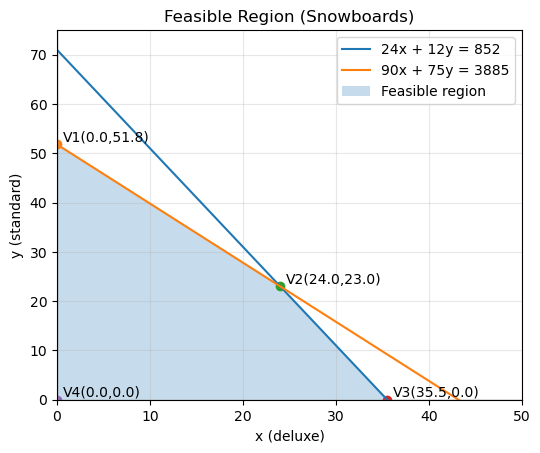


Check with scipy.optimize.linprog (max R by minimizing -R):
  status: Optimization terminated successfully. (HiGHS Status 7: Optimal)
  x* = 24.000000, y* = 23.000000,  R* = 11320.00


In [5]:
# WW Set 04 – Problem 6  

#   x = number of deluxe models
#   y = number of standard models

#   R = 280x + 200y
#      24x + 12y <= 852   
#      90x + 75y <= 3885  
#      x >= 0, y >= 0

# 1
from IPython.display import display, Math
display(Math(r"\textbf{Maximize } R=280x+200y"))
display(Math(r"\text{subject to } \; 24x+12y\le 852,\; 90x+75y\le 3885,\; x\ge0,\; y\ge0."))

# 2) corner points
#   y=0 -> 24x<=852 and 90x<=3885 -> x<=35.5  
#   x=0 -> 12y<=852 and 75y<=3885 -> y<=51.8 
corners = [
    (0.0, 0.0),
    (35.5, 0.0),
    (0.0, 51.8)
]

# Intersection:
#   24x+12y=852  ->  2x+y=71
#   90x+75y=3885 ->  6x+5y=259
# Solving:
x_int = 24.0
y_int = 23.0
corners.append((x_int, y_int))

# 3) 
corners = sorted({(round(x,6), round(y,6)) for x,y in corners}, key=lambda t: (t[0], t[1]))
print("Corner points (clockwise after starting from smallest x):")
for c in corners:
    print(" ", c)

# 4)
def R(x, y): return 280*x + 200*y
best_point = None
best_val = None
print("\nRevenue at corners:")
for (x, y) in corners:
    val = R(x, y)
    print(f"  R({x:.2f}, {y:.2f}) = {val:.2f}")
    if (best_val is None) or (val > best_val):
        best_val, best_point = val, (x, y)

print("\n>>> Maximizer from corners:")
print(f"    x* = {best_point[0]}, y* = {best_point[1]},  R* = {best_val}")

# 5) Slacks:
#    24x + 12y + s1 = 852,  s1 >= 0
#    90x + 75y + s2 = 3885, s2 >= 0
def s1(x,y): return 852 - (24*x + 12*y)
def s2(x,y): return 3885 - (90*x + 75*y)

print("\nSlack values at corners (should be >= 0):")
print("  (x,y)         s1 (hours)      s2 (material)")
for (x,y) in corners:
    print(f"  ({x:>5.2f},{y:>5.2f})   {s1(x,y):>10.2f}   {s2(x,y):>12.2f}")

# 6) shading of feasable region
import numpy as np, matplotlib.pyplot as plt

# Lines to plot
xx = np.linspace(0, 50, 400)
y_hours = (852 - 24*xx)/12      # 24x + 12y = 852
y_material = (3885 - 90*xx)/75  # 90x + 75y = 3885

plt.figure(figsize=(6,4.8))
plt.plot(xx, y_hours, label="24x + 12y = 852")
plt.plot(xx, y_material, label="90x + 75y = 3885")
plt.axvline(0, color="gray", linewidth=1)
plt.axhline(0, color="gray", linewidth=1)

# Shade feasible region by filling the polygon through the corners in order:
# Order them around their centroid just to draw a nice polygon
cx = sum(p[0] for p in corners)/len(corners)
cy = sum(p[1] for p in corners)/len(corners)
import math
corners_clockwise = sorted(corners, key=lambda p: -math.atan2(p[1]-cy, p[0]-cx))
poly_x = [p[0] for p in corners_clockwise] + [corners_clockwise[0][0]]
poly_y = [p[1] for p in corners_clockwise] + [corners_clockwise[0][1]]
plt.fill(poly_x, poly_y, alpha=0.25, label="Feasible region")

# Mark and label corners
for i,(x,y) in enumerate(corners_clockwise,1):
    plt.scatter([x],[y])
    plt.text(x+0.6, y+0.6, f"V{i}({x:.1f},{y:.1f})")

plt.xlim(0, 50); plt.ylim(0, 75)
plt.xlabel("x (deluxe)"); plt.ylabel("y (standard)")
plt.title("Feasible Region (Snowboards)")
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.show()

# 7) LP solver check (optional)
print("\nCheck with scipy.optimize.linprog (max R by minimizing -R):")
try:
    from scipy.optimize import linprog
    c = [-280, -200]  # maximize 280x+200y  <=>  minimize -(...)
    A_ub = [
        [24, 12],   # 24x + 12y <= 852
        [90, 75],   # 90x + 75y <= 3885
    ]
    b_ub = [852, 3885]
    bounds = [(0, None), (0, None)]  # x>=0, y>=0
    res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method="highs")
    if res.success:
        x_opt, y_opt = res.x
        print("  status:", res.message)
        print(f"  x* = {x_opt:.6f}, y* = {y_opt:.6f},  R* = {R(x_opt,y_opt):.2f}")
    else:
        print("  solver failed:", res.message)
except Exception as e:
    print("  scipy not available (that's fine for class). Error:", e)